In [1]:
# Welcome to InnoVest!

print(f'Enjoy reviewing our InnoVest mainframe code!')

Enjoy reviewing our InnoVest mainframe code!


In [2]:
# Setting the story...

# Some investors profit by finding stocks that are overvalued or undervalued based on market sentiment. 

# They use various indicators to measure market sentiment that help determine the best stocks to trade. 

# Popular sentiment indicators include the Internet Search Activity, Bullish Percent Index (BPI) and moving averages.

In [3]:
# Imports & Engines

import pandas as pd
import hvplot.pandas
from pathlib import Path
import os
import requests
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Load .env environment to ensure all systems go!
load_dotenv()

True

In [5]:
#Set Alpaca API key and secret

alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

#Create Alpaca API object

alpaca_api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="V2")

In [6]:
# Format start and end dates as ISO format for One Year period

start = pd.Timestamp("2022-08-02", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-08-02", tz="America/New_York").isoformat()

# Configure Data Parameters

tickers = ['SPY', 'TSLA', 'LCID', 'F', 'META', 'RBLX', 'AAPL', 'GOOG', 'MSFT', 'NVDA']

# Adjusting Timeframe to 1Week instead of 1Day due to Google Trends Data Output

timeframe = "1Week"

# Get closing price market data for specitfically identified 'innovative' stocks, for last year

portfolio_year_df = alpaca_api.get_bars(tickers, timeframe, start=start, end=end).df

# Clean up data to have information we need and interested in

portfolio_year_df.drop(columns=['open', 'high', 'low', 'volume', 'trade_count', 'vwap'], inplace=True)

# Show dataframe of closing prices

portfolio_year_df

,close,symbol
timestamp,,
2022-08-08 04:00:00+00:00,172.10,AAPL
2022-08-15 04:00:00+00:00,171.52,AAPL
2022-08-22 04:00:00+00:00,163.62,AAPL
2022-08-29 04:00:00+00:00,155.81,AAPL
2022-09-05 04:00:00+00:00,157.37,AAPL
...,...,...
2023-07-03 04:00:00+00:00,274.43,TSLA
2023-07-10 04:00:00+00:00,281.40,TSLA
2023-07-17 04:00:00+00:00,260.02,TSLA


In [7]:
# Separate Specific Ticker Information from Dataframe

spy_data = portfolio_year_df[portfolio_year_df['symbol'] == 'SPY']
tsla_data = portfolio_year_df[portfolio_year_df['symbol'] == 'TSLA']
lcid_data = portfolio_year_df[portfolio_year_df['symbol'] == 'LCID']
f_data = portfolio_year_df[portfolio_year_df['symbol'] == 'F']
meta_data = portfolio_year_df[portfolio_year_df['symbol'] == 'META']
rblx_data = portfolio_year_df[portfolio_year_df['symbol'] == 'RBLX']
aapl_data = portfolio_year_df[portfolio_year_df['symbol'] == 'AAPL']
goog_data = portfolio_year_df[portfolio_year_df['symbol'] == 'GOOG']
msft_data = portfolio_year_df[portfolio_year_df['symbol'] == 'MSFT']
nvda_data = portfolio_year_df[portfolio_year_df['symbol'] == 'NVDA']

In [8]:
# Ensure Clean Separate Ticker Data

meta_data.tail()

,close,symbol
timestamp,,
2023-07-03 04:00:00+00:00,290.53,META
2023-07-10 04:00:00+00:00,308.87,META
2023-07-17 04:00:00+00:00,294.26,META
2023-07-24 04:00:00+00:00,325.48,META
2023-07-31 04:00:00+00:00,310.73,META


In [9]:
# Choose specific Stock Close (Pricing) information column and get Daily Returns

spy_daily_returns = spy_data['close'].pct_change()
tsla_daily_returns = tsla_data['close'].pct_change()
lcid_daily_returns = lcid_data['close'].pct_change()
f_daily_returns = f_data['close'].pct_change()
meta_daily_returns = meta_data['close'].pct_change()
rblx_daily_returns = rblx_data['close'].pct_change()
aapl_daily_returns = aapl_data['close'].pct_change()
goog_daily_returns = goog_data['close'].pct_change()
msft_daily_returns = msft_data['close'].pct_change()
nvda_daily_returns = nvda_data['close'].pct_change()

In [10]:
# Ensure Clean Separate Stock Daily Returns

f_daily_returns.head()

timestamp
2022-08-08 04:00:00+00:00         NaN
2022-08-15 04:00:00+00:00   -0.018541
2022-08-22 04:00:00+00:00   -0.029597
2022-08-29 04:00:00+00:00   -0.016223
2022-09-05 04:00:00+00:00    0.017150
Name: close, dtype: float64

In [11]:
# Combined Daily Returns into Dataframe with all Stocks

combined_dly_rtn = pd.concat([spy_daily_returns, tsla_daily_returns, lcid_daily_returns, f_daily_returns, meta_daily_returns, rblx_daily_returns, aapl_daily_returns, goog_daily_returns, msft_daily_returns, nvda_daily_returns], axis="columns", join="inner")

# Remame Columns in newly created concatenated Daily Returns DataFrame

combined_dly_rtn.columns = ["SPY", "TSLA", "LCID", "F", "META", "RBLX", "AAPL", "GOOG", "MSFT", "NVDA"]

# Show cleaned up, individual stock Daily Returns together

combined_dly_rtn.head()

,SPY,TSLA,LCID,F,META,RBLX,AAPL,GOOG,MSFT,NVDA
timestamp,,,,,,,,,,
2022-08-08 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-15 04:00:00+00:00,-0.011613,-0.011210,-0.102358,-0.018541,-0.069474,-0.165591,-0.003370,-0.036934,-0.019732,-0.045967
2022-08-22 04:00:00+00:00,-0.039868,-0.676303,-0.030448,-0.029597,-0.036794,-0.073102,-0.046059,-0.057738,-0.063114,-0.089025
2022-08-29 04:00:00+00:00,-0.032247,-0.062064,-0.066502,-0.016223,-0.009025,-0.040950,-0.047733,-0.023540,-0.044873,-0.160701
2022-09-05 04:00:00+00:00,0.036610,0.109063,-0.005277,0.017150,0.055077,0.200053,0.010012,0.028524,0.032805,0.054224


In [12]:
# Set up to show info for corresponding stocks and group them by sectors in Cells 

In [13]:
# Electric Vehicles

print('Here are the best EV stocks risk indicators:')
print('')

# TSLA 

print(f'This is the information for TSLA:')
print('')
tsla_covariance = combined_dly_rtn['TSLA'].cov(combined_dly_rtn['SPY'])
print(f'The covariance is {tsla_covariance}.')

tsla_variance = combined_dly_rtn['SPY'].var()
print(f'The variance is {tsla_variance}.')

tsla_beta = tsla_covariance / tsla_variance
print(f'The beta for $TSLA is {tsla_beta}.')

print('')
# 'LCID'

print(f'This is the information for LCID:')
print('')

lcid_covariance = combined_dly_rtn['LCID'].cov(combined_dly_rtn['SPY'])
print(f'The covariance is {lcid_covariance}.')

lcid_variance = combined_dly_rtn['SPY'].var()
print(f'The variance is {lcid_variance}.')

lcid_beta = lcid_covariance / lcid_variance
print(f'The beta for $LCID is {lcid_beta}.')
print('')

# 'F'

print(f'This is the information for F:')
print('')

f_covariance = combined_dly_rtn['F'].cov(combined_dly_rtn['SPY'])
print(f'The covariance is {f_covariance}.')

f_variance = combined_dly_rtn['SPY'].var()
print(f'The variance is {f_variance}.')

f_beta = f_covariance / f_variance
print(f'The beta for $F is {f_beta}.')
print('')

Here are the best EV stocks risk indicators:

This is the information for TSLA:

The covariance is 0.0015573947721996557.
The variance is 0.0006134141373193083.
The beta for $TSLA is 2.5388961183804035.

This is the information for LCID:

The covariance is 0.001283305469815276.
The variance is 0.0006134141373193083.
The beta for $LCID is 2.0920702535867064.

This is the information for F:

The covariance is 0.0009744966496654645.
The variance is 0.0006134141373193083.
The beta for $F is 1.588643936255087.



In [14]:
# Metaverse

print('Here are the best Metaverse stocks risk indicators:')
print('')

# 'META'

print(f'This is the information for META:')
print('')

meta_covariance = combined_dly_rtn['META'].cov(combined_dly_rtn['SPY'])
print(f'The covariance is {meta_covariance}.')

meta_variance = combined_dly_rtn['SPY'].var()
print(f'The variance is {meta_variance}.')

meta_beta = meta_covariance / meta_variance
print(f'The beta for $META is {meta_beta}.')
print('')

# 'RBLX'

print(f'This is the information for RBLX:')
print('')

rblx_covariance = combined_dly_rtn['RBLX'].cov(combined_dly_rtn['SPY'])
print(f'The covariance is {rblx_covariance}.')

rblx_variance = combined_dly_rtn['SPY'].var()
print(f'The variance is {rblx_variance}.')

rblx_beta = rblx_covariance / rblx_variance
print(f'The beta for $RBLX is {rblx_beta}.')
print('')

# 'AAPL'

print(f'This is the information for AAPL:')
print('')

aapl_covariance = combined_dly_rtn['AAPL'].cov(combined_dly_rtn['SPY'])
print(f'The covariance is {aapl_covariance}.')

aapl_variance = combined_dly_rtn['SPY'].var()
print(f'The variance is {aapl_variance}.')

aapl_beta = aapl_covariance / aapl_variance
print(f'The beta for $AAPL is {aapl_beta}.')
print('')

Here are the best Metaverse stocks risk indicators:

This is the information for META:

The covariance is 0.0009663386700967113.
The variance is 0.0006134141373193083.
The beta for $META is 1.575344634735229.

This is the information for RBLX:

The covariance is 0.0012184667409831475.
The variance is 0.0006134141373193083.
The beta for $RBLX is 1.9863688605352168.

This is the information for AAPL:

The covariance is 0.000734357158863983.
The variance is 0.0006134141373193083.
The beta for $AAPL is 1.1971637335800733.



In [15]:
# Artificial Intelligence Stocks

print('Here are the best Artificial Intelligence stocks risk indicators:')
print('')

# 'GOOG'

print(f'This is the information for GOOG:')
print('')

goog_covariance = combined_dly_rtn['GOOG'].cov(combined_dly_rtn['SPY'])
print(f'The covariance is {goog_covariance}.')

goog_variance = combined_dly_rtn['SPY'].var()
print(f'The variance is {goog_variance}.')

goog_beta = goog_covariance / goog_variance
print(f'The beta for $GOOG is {goog_beta}.')
print('')

# 'MSFT'
print(f'This is the information for MSFT:')
print('')

msft_covariance = combined_dly_rtn['MSFT'].cov(combined_dly_rtn['SPY'])
print(f'The covariance is {msft_covariance}.')

msft_variance = combined_dly_rtn['SPY'].var()
print(f'The variance is {msft_variance}.')

msft_beta = msft_covariance / msft_variance
print(f'The beta for $MSFT is {msft_beta}.')
print('')

# 'NVDA'

print(f'This is the information for NVDA:')
print('')

nvda_covariance = combined_dly_rtn['NVDA'].cov(combined_dly_rtn['SPY'])
print(f'The covariance is {nvda_covariance}.')

nvda_variance = combined_dly_rtn['SPY'].var()
print(f'The variance is {nvda_variance}.')

nvda_beta = nvda_covariance / nvda_variance
print(f'The beta for $NVDA is {nvda_beta}.')
print('')

Here are the best Artificial Intelligence stocks risk indicators:

This is the information for GOOG:

The covariance is 0.0007473466127872078.
The variance is 0.0006134141373193083.
The beta for $GOOG is 1.2183394012619273.

This is the information for MSFT:

The covariance is 0.0007066380186872674.
The variance is 0.0006134141373193083.
The beta for $MSFT is 1.1519754366525663.

This is the information for NVDA:

The covariance is 0.0011432417367334658.
The variance is 0.0006134141373193083.
The beta for $NVDA is 1.86373555348686.



In [16]:
# Isolate specific stocks to show Daily Returns for that particular innovative sector in future recommended portfolio

ev_port_daily = combined_dly_rtn.iloc[:,1:4]
meta_port_daily = combined_dly_rtn.iloc[:,4:7]
ai_port_daily = combined_dly_rtn.iloc[:,6:9]

In [17]:
# Does it work?

ai_port_daily.head()

,AAPL,GOOG,MSFT
timestamp,,,
2022-08-08 04:00:00+00:00,NaN,NaN,NaN
2022-08-15 04:00:00+00:00,-0.003370,-0.036934,-0.019732
2022-08-22 04:00:00+00:00,-0.046059,-0.057738,-0.063114
2022-08-29 04:00:00+00:00,-0.047733,-0.023540,-0.044873
2022-09-05 04:00:00+00:00,0.010012,0.028524,0.032805


In [18]:
# Write Code showing Annualized Standard Deviation

daily_std = combined_dly_rtn.std()

# Identify the stock with the most risk

daily_std = combined_dly_rtn.std().sort_values()

# Calculate the annualized standard deviation (52 weeks for each week of data)

annualized_std = daily_std * np.sqrt(52)

# What's the story here?

print('')
print(f'Standard deviation is useful for measuring the absolute risk of an asset or a portfolio, regardless of the market or benchmark.') 
print('')
print(f'It helps investors to assess the potential range of outcomes and the probability of achieving a certain return.')
print('')

annualized_std.hvplot.bar(xlabel='Stock Ticker $', ylabel='Annualized Standard Deviation', title='Volatility', color='red')


Standard deviation is useful for measuring the absolute risk of an asset or a portfolio, regardless of the market or benchmark.

It helps investors to assess the potential range of outcomes and the probability of achieving a certain return.



:Bars   [index]   (0)

In [19]:
# Equal Distribution of Stock Concentration 
# Will configure stock to later show to show potential returns, with specific initial dollar ivestment amount, based on your risk tolerance

initial_investment = 10000
weight = [.1, .1, .1, .1, .1, .1, .1, .1, .1, .1]

portfolio_returns = combined_dly_rtn.dot(weight)

cumulative_returns = (1 + portfolio_returns).cumprod()
(initial_investment * cumulative_returns).hvplot(xlabel='A Year Ago Today', ylabel='Portfolio Valuation in $USD', title='Equal Weighted Portfolio')

:Curve   [timestamp]   (0)

In [20]:
# New Library or Tools to be used here

# Import NEW libraries

# Make sure you download required libs and resources by using 'pip install pyfolio-reloaded' in your Terminal/Command Prompt/Anaconda Prompt

import pyfolio as pf
import riskfolio as rp
from empyrial import empyrial, Engine
import yfinance as yf
import warnings

/Users/alexisreyes/anaconda3/envs/dev/lib/python3.10/site-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


(CVXPY) Aug 08 04:13:50 PM: Encountered unexpected exception importing solver SCS:
ImportError("dlopen(/Users/alexisreyes/anaconda3/envs/dev/lib/python3.10/site-packages/_scs_direct.cpython-310-darwin.so, 0x0002): Library not loaded: @rpath/liblapack.3.dylib\n  Referenced from: <EA245032-41C7-30EA-BA1A-C55492696949> /Users/alexisreyes/anaconda3/envs/dev/lib/python3.10/site-packages/_scs_direct.cpython-310-darwin.so\n  Reason: tried: '/Users/alexisreyes/anaconda3/envs/dev/lib/python3.10/site-packages/../../liblapack.3.dylib' (no such file), '/Users/alexisreyes/anaconda3/envs/dev/lib/python3.10/site-packages/../../liblapack.3.dylib' (no such file), '/Users/alexisreyes/anaconda3/envs/dev/bin/../lib/liblapack.3.dylib' (no such file), '/Users/alexisreyes/anaconda3/envs/dev/bin/../lib/liblapack.3.dylib' (no such file), '/usr/local/lib/liblapack.3.dylib' (no such file), '/usr/lib/liblapack.3.dylib' (no such file, not in dyld cache)")


In [21]:
# Test out new Libraries Space

tesla_stock_history = pf.utils.get_symbol_rets('TSLA')
tesla_stock_history.head()

[*********************100%***********************]  1 of 1 completed


Date
2010-06-30 00:00:00+00:00   -0.002511
2010-07-01 00:00:00+00:00   -0.078473
2010-07-02 00:00:00+00:00   -0.125683
2010-07-06 00:00:00+00:00   -0.160937
2010-07-07 00:00:00+00:00   -0.019243
Name: TSLA, dtype: float64

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,73.63,2021-11-04,2023-01-03,NaT,NaN
1,60.63,2020-02-19,2020-03-18,2020-06-08,79
2,53.51,2017-09-18,2019-06-03,2019-12-18,588
3,49.77,2014-09-04,2016-02-10,2017-04-03,673
4,38.46,2010-11-24,2011-02-23,2012-03-12,339


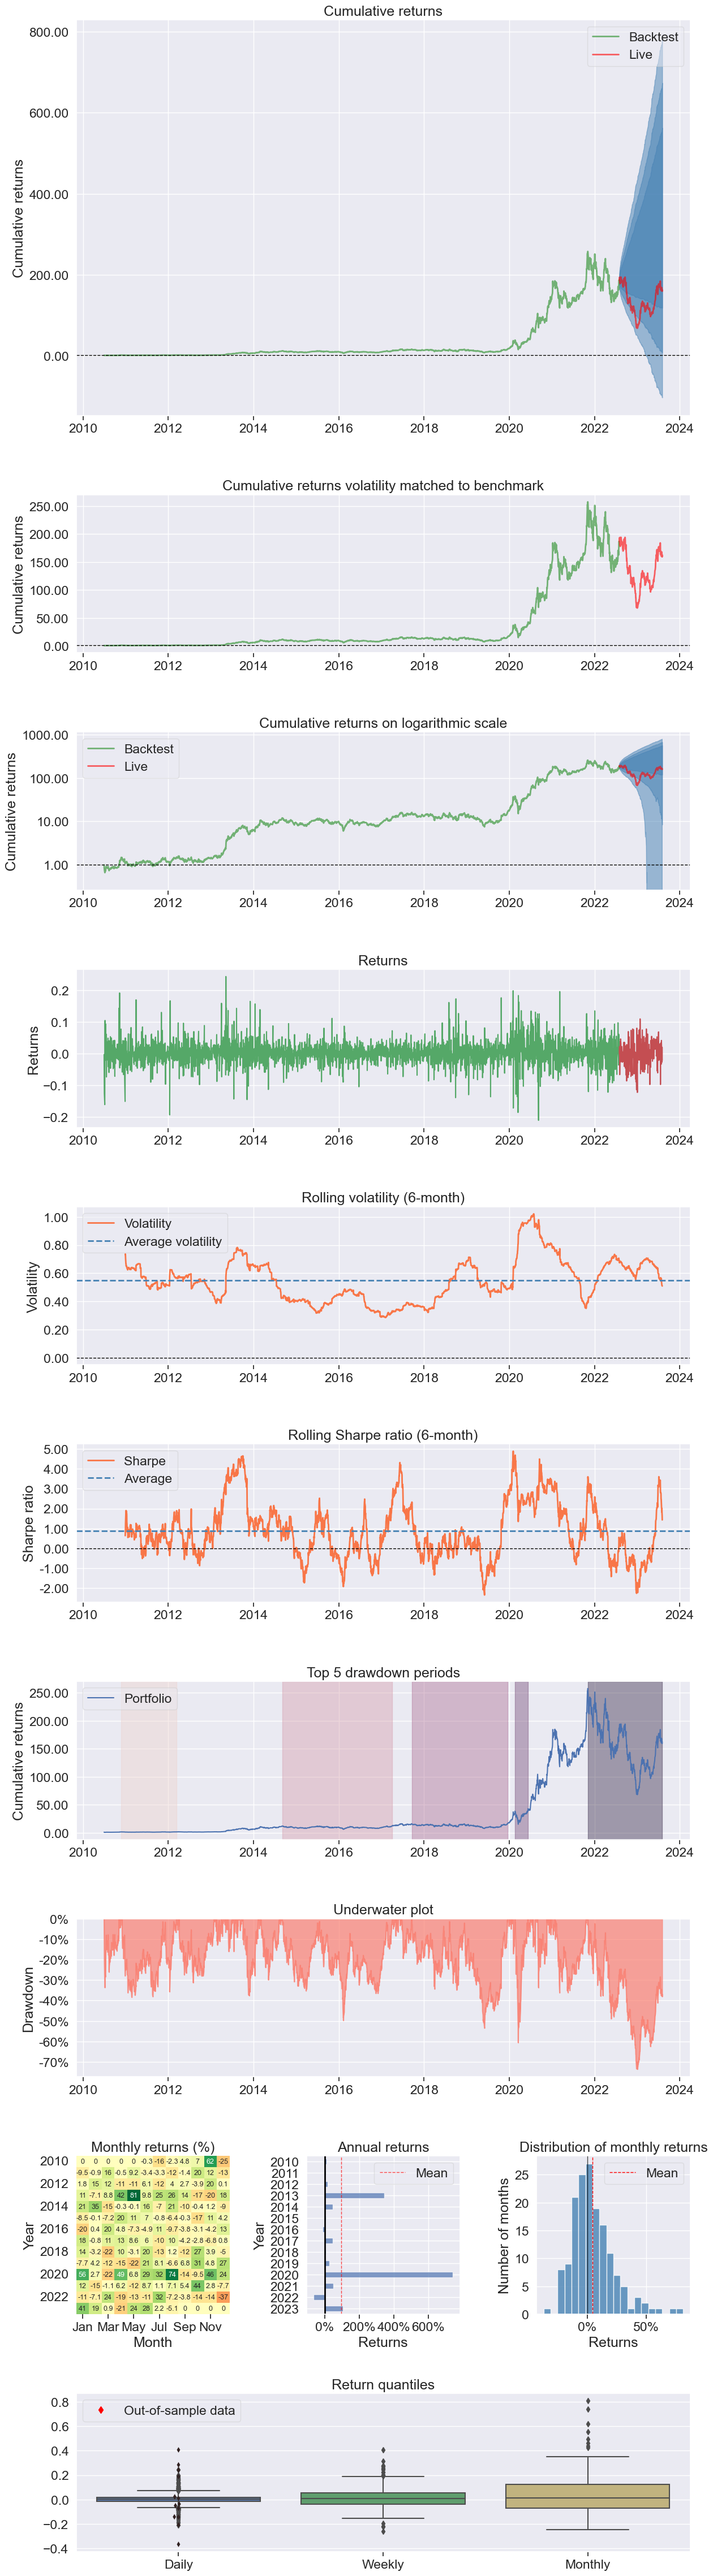

In [22]:

pf.create_returns_tear_sheet(tesla_stock_history, live_start_date='2022-08-01')

names = ['SPY', 'TSLA', 'LCID', 'F']
start_date = '2022-08-01'
end_date = '2023-08-01'

In [23]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import riskfolio as rp

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2022-08-01'
end = '2023-08-01'

# Tickers of assets
assets = ['LCID', 'TSLA', 'F', 'META', 'RBLX', 'AAPL', 'MSFT',
          'GOOGL', 'NVDA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

# Calculating Daily returns

Y = data[assets].iloc[-252:,:].pct_change().dropna()

display(Y.tail())

[*********************100%***********************]  9 of 9 completed


,AAPL,F,GOOGL,LCID,META,MSFT,NVDA,RBLX,TSLA
Date,,,,,,,,,
2023-07-25,0.4514%,-2.7221%,0.5595%,-4.6025%,0.9808%,1.7009%,2.3917%,0.2781%,-1.4049%
2023-07-26,0.4545%,0.6627%,5.7769%,4.8246%,1.3923%,-3.7638%,-0.4970%,0.7312%,-0.3506%
2023-07-27,-0.6581%,0.4389%,0.1006%,-3.9052%,4.4010%,-2.0872%,0.9857%,-5.1064%,-3.2684%
2023-07-28,1.3508%,-3.4232%,2.4575%,8.4180%,4.4176%,2.3131%,1.8519%,2.6906%,4.1962%
2023-07-31,0.3166%,-0.3771%,0.1056%,1.8742%,-2.1138%,-0.7241%,-0.0449%,0.8220%,0.3716%


In [24]:
# Tickers of factors

factors = ['MTUM', 'QUAL', 'VLUE', 'SIZE', 'USMV']
factors.sort()

tickers = assets + factors
tickers.sort()

# Downloading data

data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers

# Calculating returns

X = data[factors].pct_change().dropna()
Y = data[assets].pct_change().dropna()

display(X.head())

[*********************100%***********************]  14 of 14 completed


,MTUM,QUAL,SIZE,USMV,VLUE
Date,,,,,
2022-08-02,-0.5478%,-0.8463%,-0.2761%,-0.6389%,-1.1463%
2022-08-03,0.2189%,1.2927%,1.3590%,1.1081%,1.1912%
2022-08-04,-1.1557%,0.2372%,-0.1324%,-0.0271%,-0.5938%
2022-08-05,0.3493%,-0.1714%,0.3398%,0.1759%,-0.1572%
2022-08-08,0.3765%,-0.0572%,0.4708%,0.2837%,0.2519%


In [25]:
# Bringing in Portfolio Data

port = rp.Portfolio(returns=Y)

# Process to calculate optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate/simulate a optimal portfolio with MINIMAL RISK:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

# Show Optimal Allocation of Best Minimal Risk Stocks

display(w.T)

,AAPL,F,GOOGL,LCID,META,MSFT,NVDA,RBLX,TSLA
weights,51.9583%,19.8943%,3.4389%,0.0000%,0.0000%,24.7084%,0.0000%,0.0000%,0.0000%


,AAPL,F,GOOGL,LCID,META,MSFT,NVDA,RBLX,TSLA
0,51.9583%,19.8943%,3.4389%,0.0000%,0.0000%,24.7084%,0.0000%,0.0000%,0.0000%
1,54.7160%,13.4349%,0.0000%,0.0000%,4.9651%,25.5534%,1.3305%,0.0000%,0.0000%
2,54.0062%,11.8836%,0.0000%,0.0000%,6.9403%,22.8426%,4.3274%,0.0000%,0.0000%
3,53.3806%,10.4877%,0.0000%,0.0000%,8.7091%,20.4074%,7.0152%,0.0000%,0.0000%
4,52.7811%,9.2148%,0.0000%,0.0000%,10.3415%,18.1780%,9.4845%,0.0000%,0.0000%


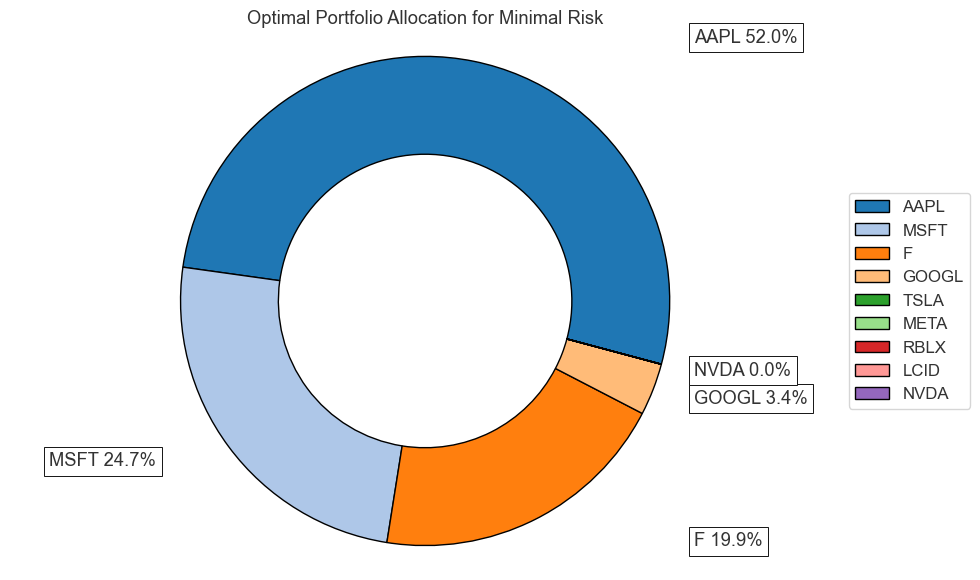

In [26]:
# Plotting the composition of the optimal portfolio for risk-adverse/conservative investors:

ax = rp.plot_pie(w=w, title='Optimal Portfolio Allocation for Minimal Risk', others=.9, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

points = 50 # Number of points of the frontier / similar to simulated amounts in Monte Carlo

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

# Show first 5 simulations

display(frontier.T.head())

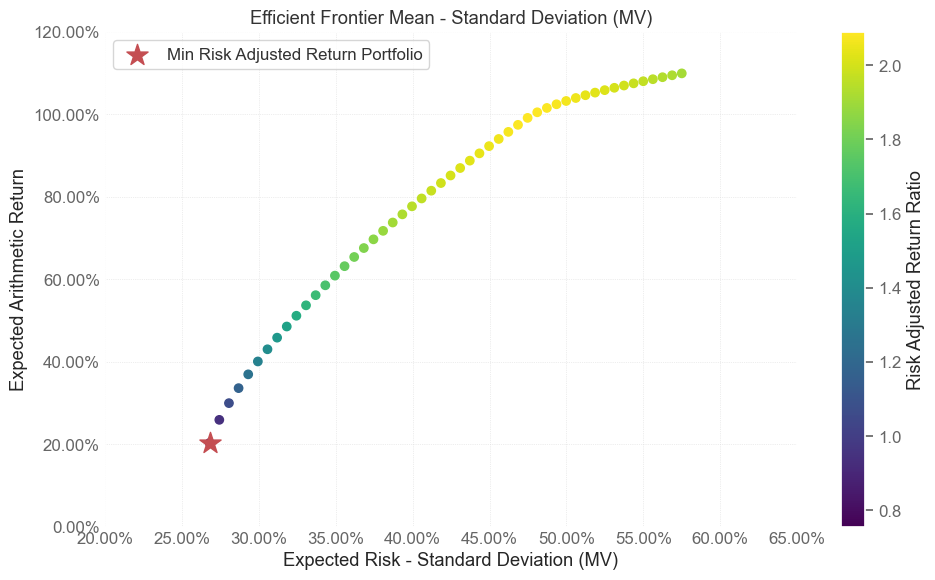

In [27]:
# Plotting the efficient frontier

label = 'Min Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

In [28]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [29]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
AAPL,51.96%,63.50%,51.87%,59.33%,51.77%,42.41%,21.49%,0.00%,22.99%,67.50%,41.15%,64.88%,33.58%
F,19.89%,12.99%,18.01%,9.78%,16.74%,19.38%,23.93%,34.04%,16.97%,0.00%,1.28%,0.00%,8.53%
GOOGL,3.44%,6.25%,0.00%,5.96%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
LCID,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,3.29%,7.69%,0.00%,0.00%,0.00%,0.00%,0.00%
META,0.00%,0.00%,0.00%,4.20%,0.00%,3.17%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
MSFT,24.71%,17.27%,30.12%,20.74%,31.49%,35.04%,43.01%,32.48%,60.05%,11.98%,57.57%,24.80%,57.89%
NVDA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,20.52%,0.00%,10.32%,0.00%
RBLX,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
TSLA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,8.28%,25.78%,0.00%,0.00%,0.00%,0.00%,0.00%


Start date: 2022-08-01
End date: 2023-08-08


,Backtest
,
Annual return,137.02%
Cumulative return,139.47%
Annual volatility,48.88 %
Winning day ratio,54.12%
Sharpe ratio,2.01
Calmar ratio,2.16
Information ratio,1.0000%
Stability,0.82
Max Drawdown,-37.59 %


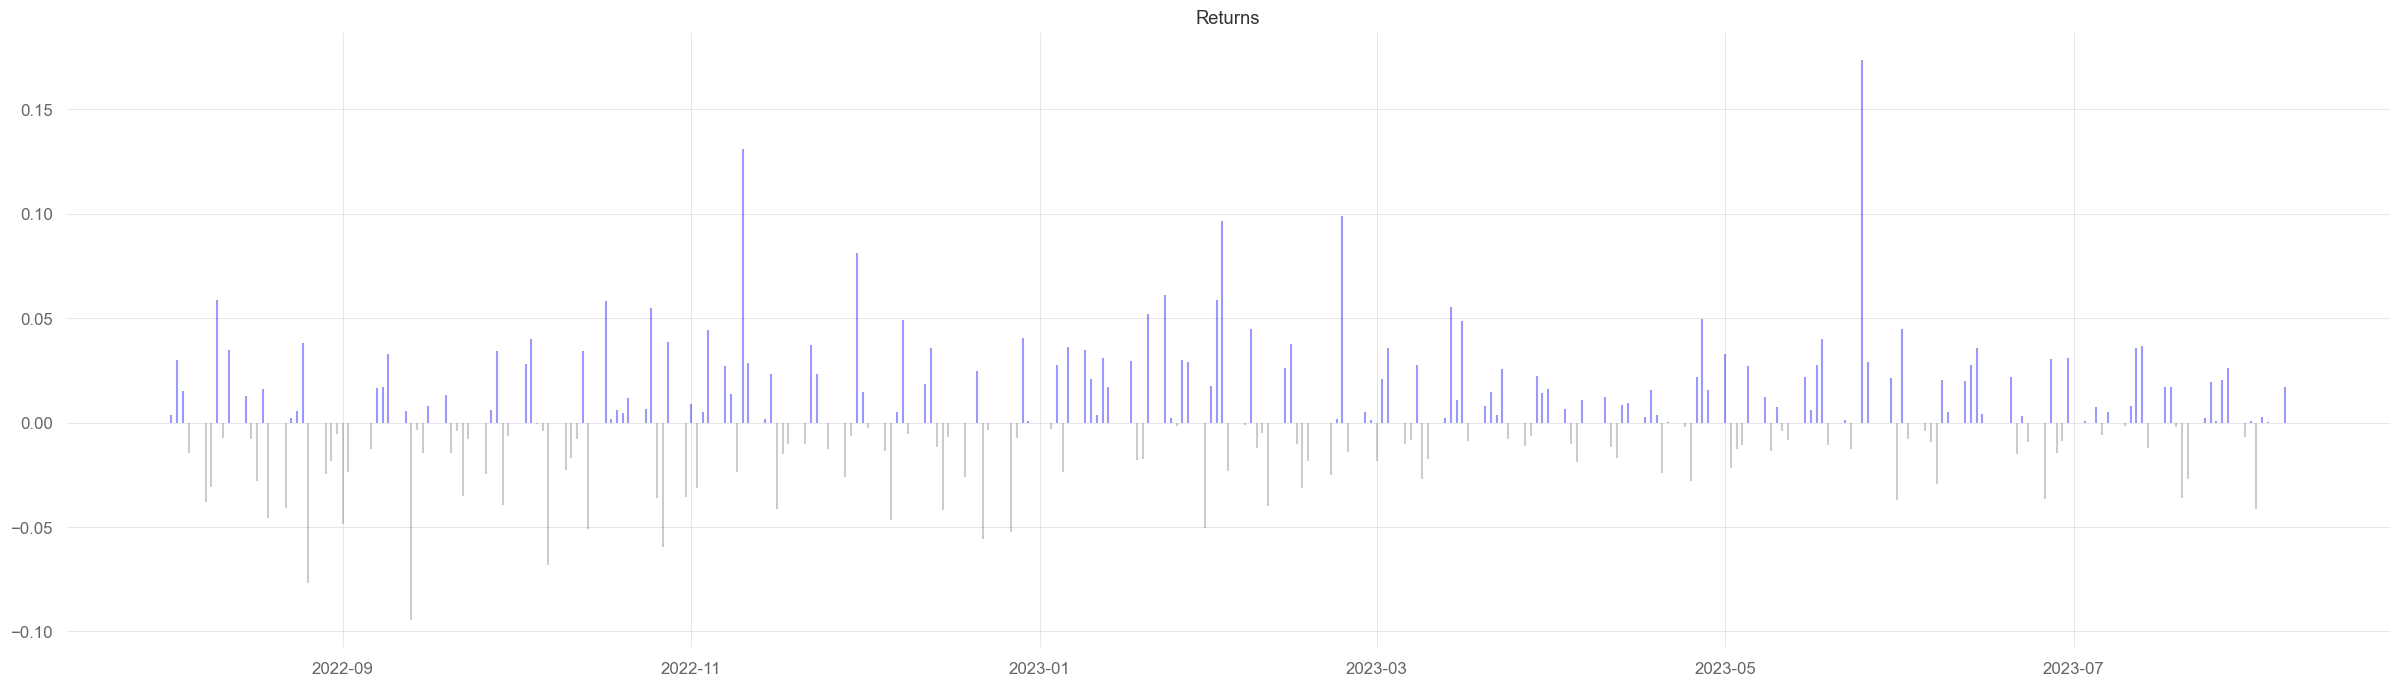

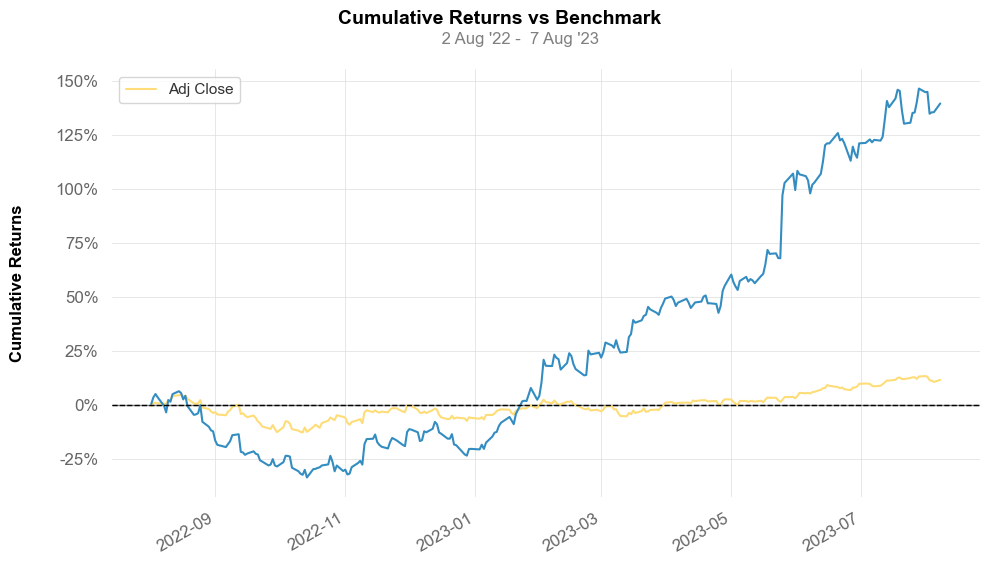

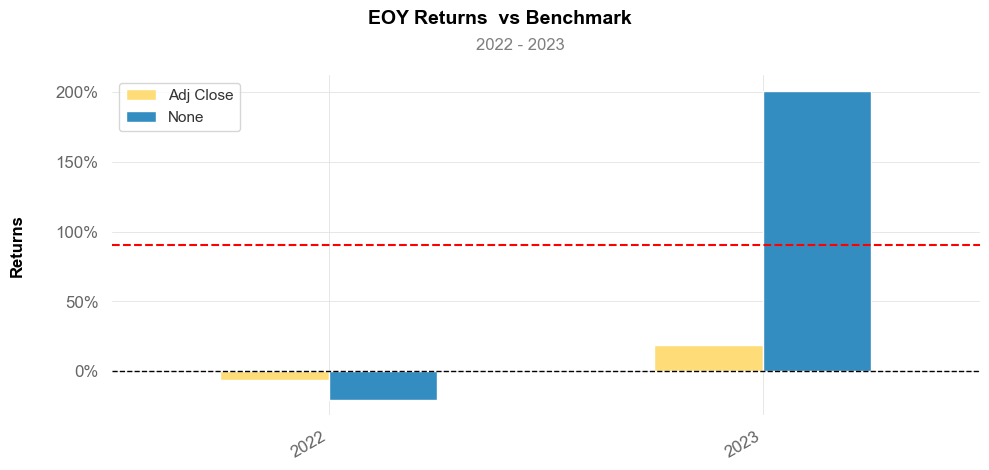

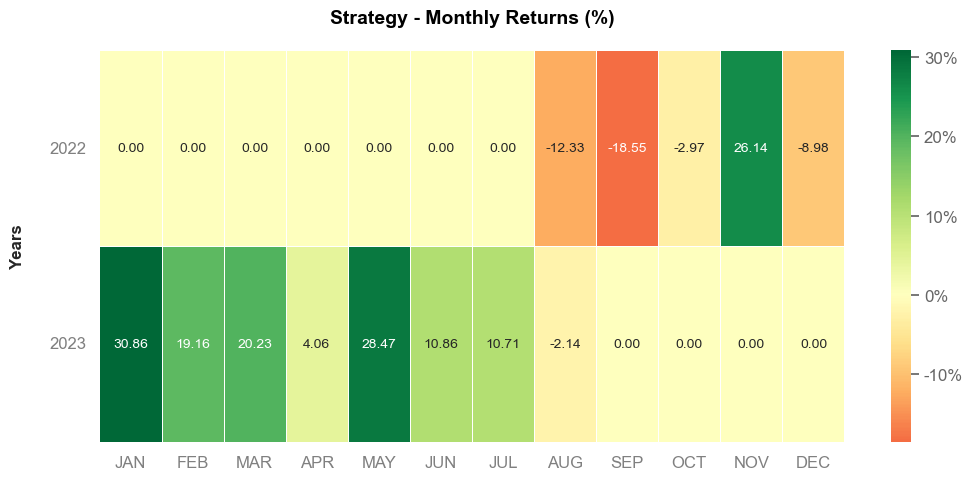

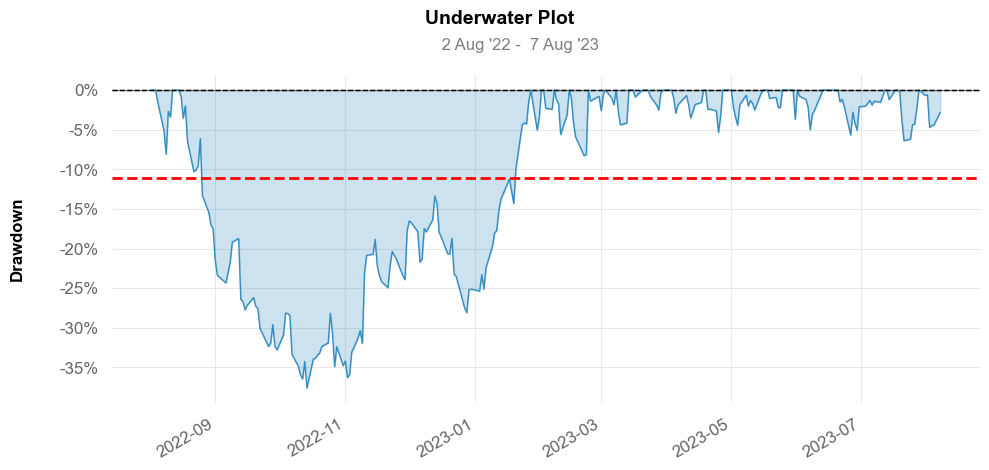

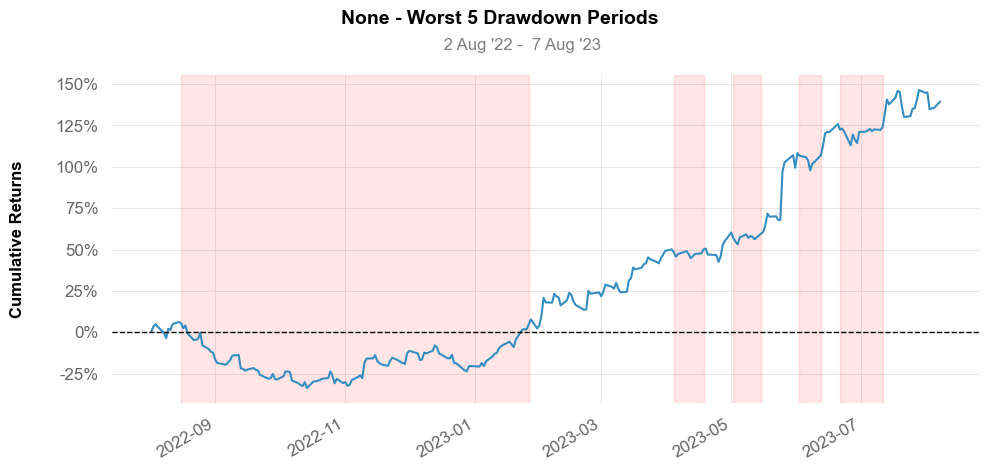

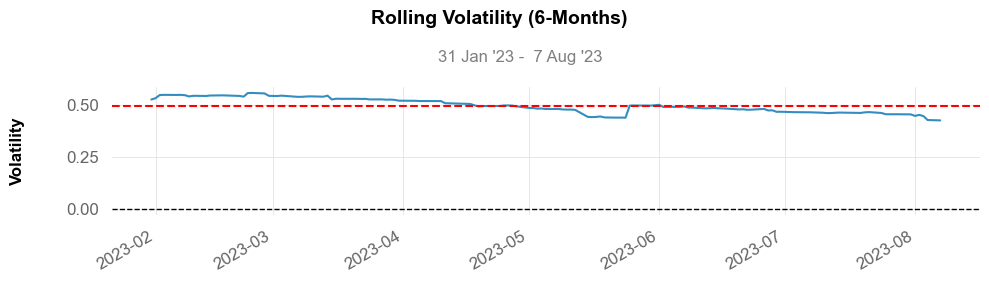

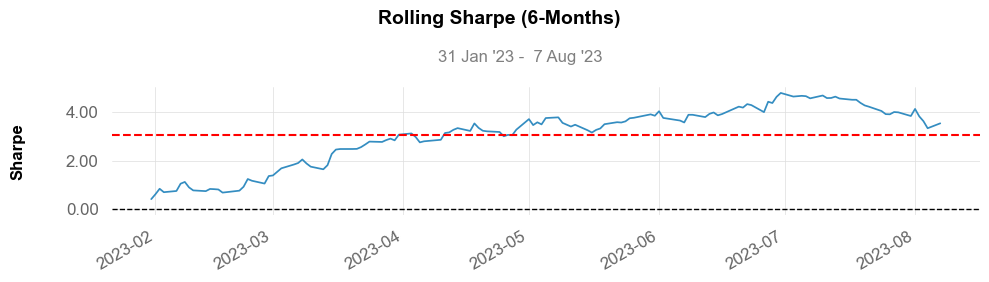

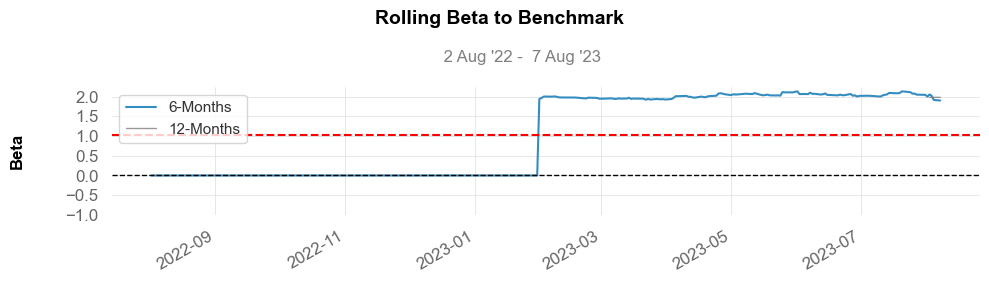

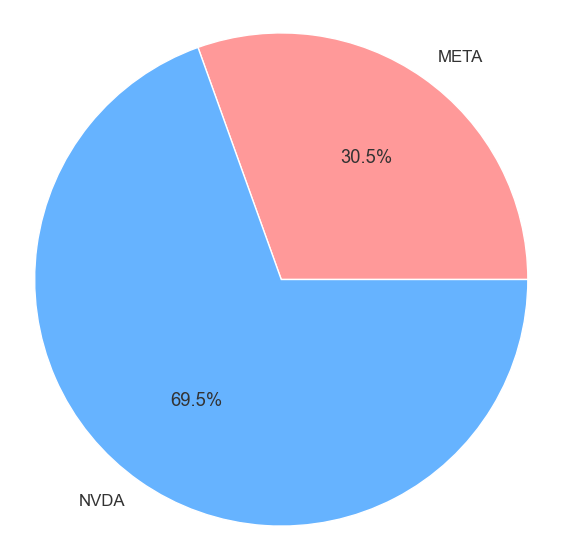

(None, None, None, None, None, None, None, None, None)

In [30]:
# Global Efficient

# The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. (Source: Investopedia)

from empyrial import empyrial, Engine

most_efficient = Engine(
      start_date = "2022-08-01",
      benchmark = ["SPY"], #SPY is set by default
      portfolio = ["LCID", "TSLA", "F", "META", "RBLX", "AAPL", "MSFT", "GOOG", "NVDA"],
      optimizer = "EF" # This designates the Efficient Frontier analysis we're asking for
)

# Run and show Portfolio Optimization for Global Efficiency amongst Innovative Stocks

empyrial(most_efficient)

Start date: 2022-08-01
End date: 2023-08-08


,Backtest
,
Annual return,15.01%
Cumulative return,15.2%
Annual volatility,36.37 %
Winning day ratio,50.2%
Sharpe ratio,0.56
Calmar ratio,0.26
Information ratio,0.0000%
Stability,0.34
Max Drawdown,-39.16 %


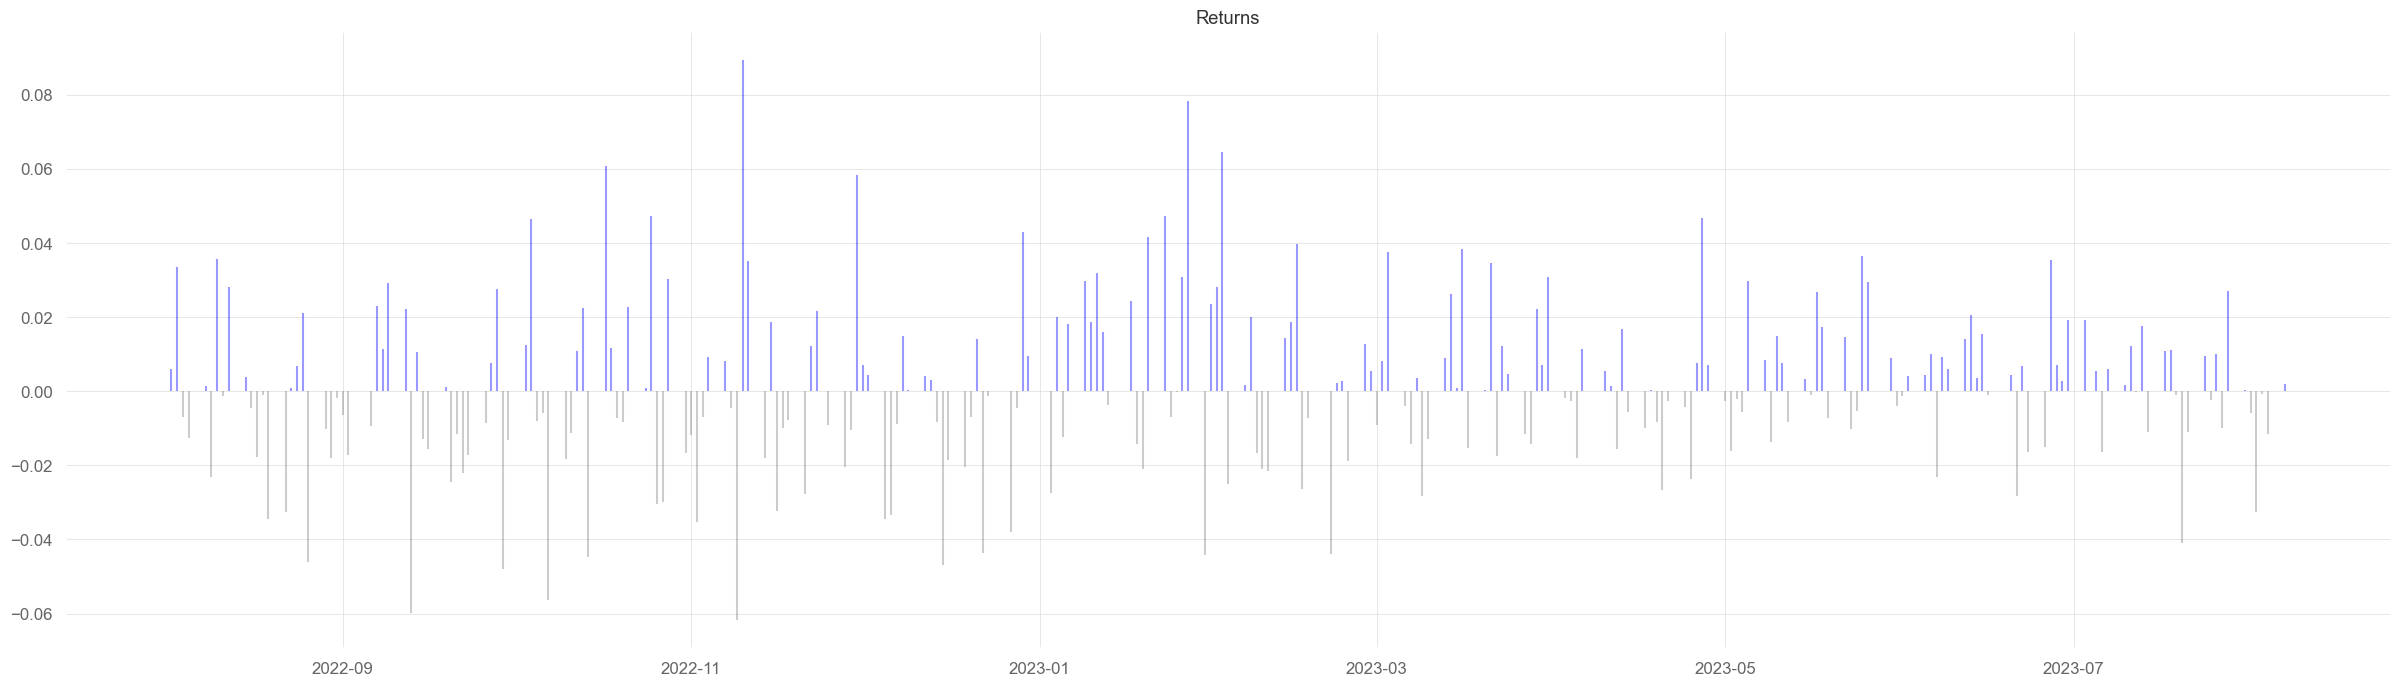

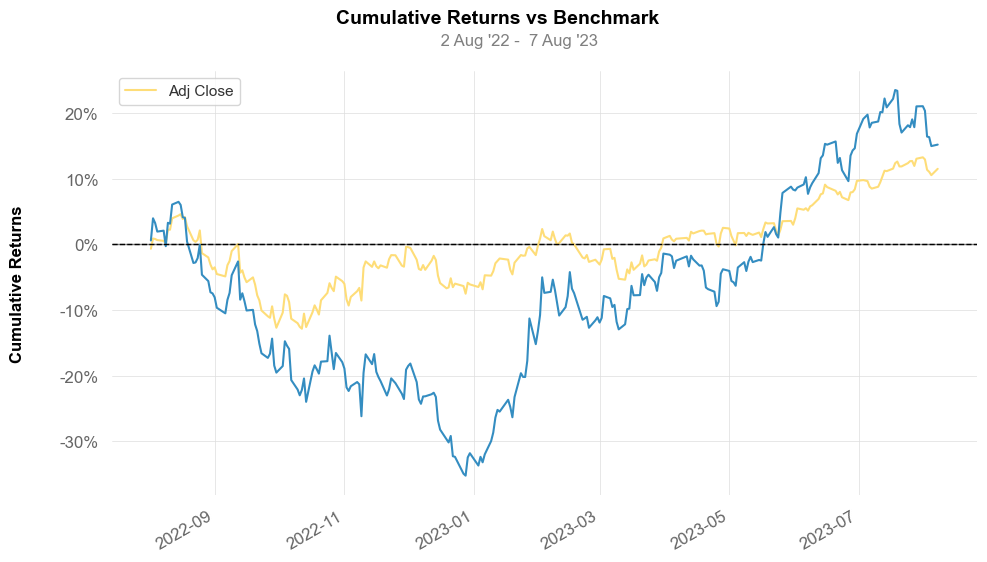

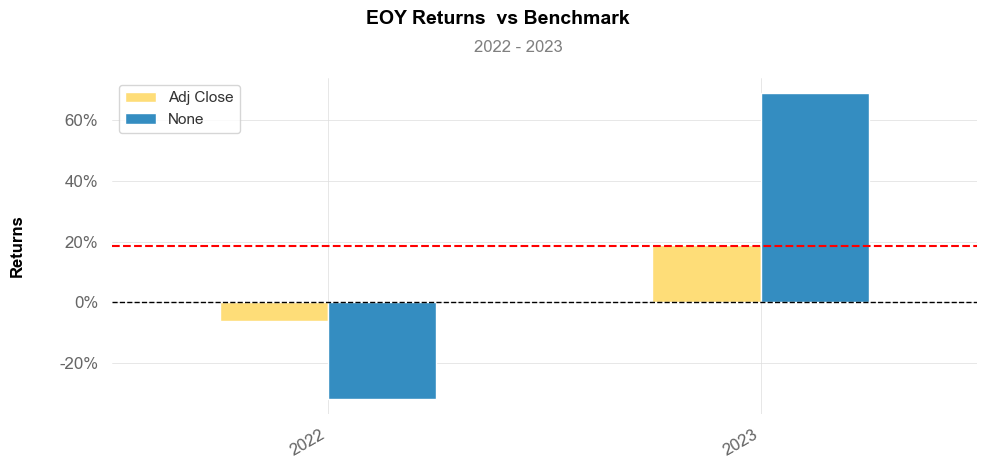

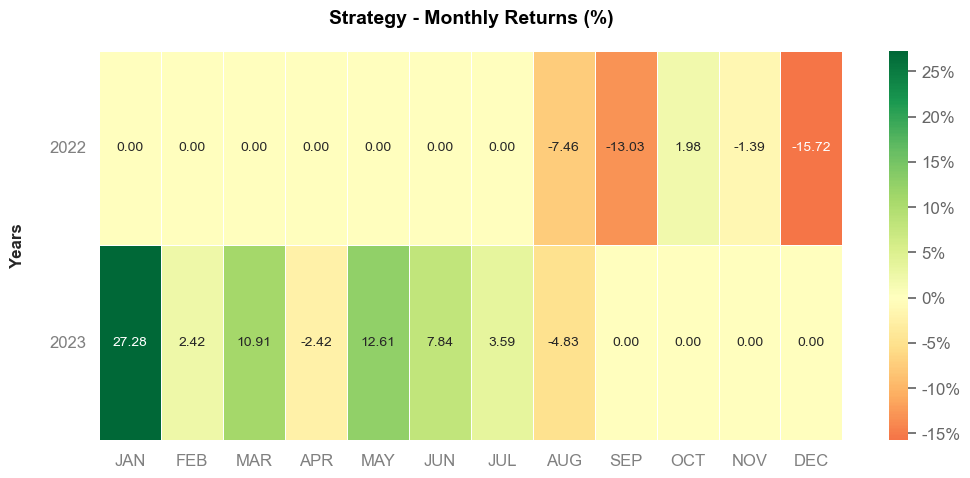

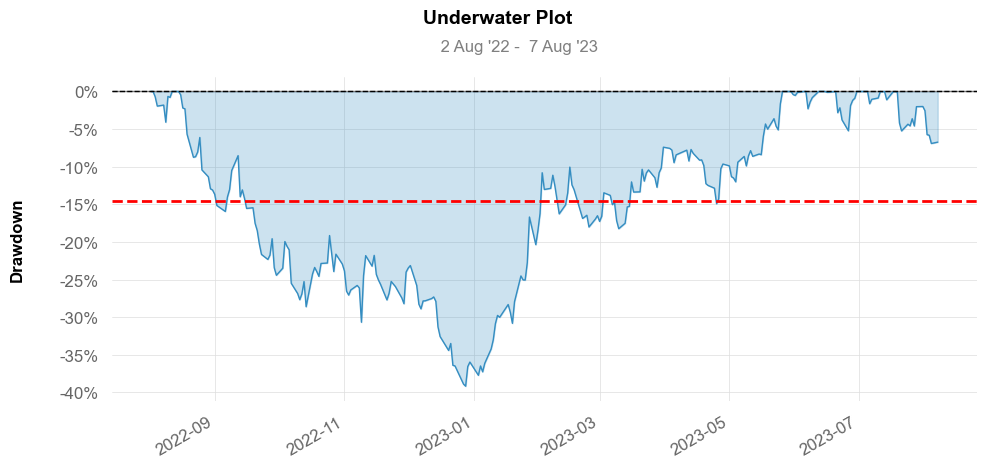

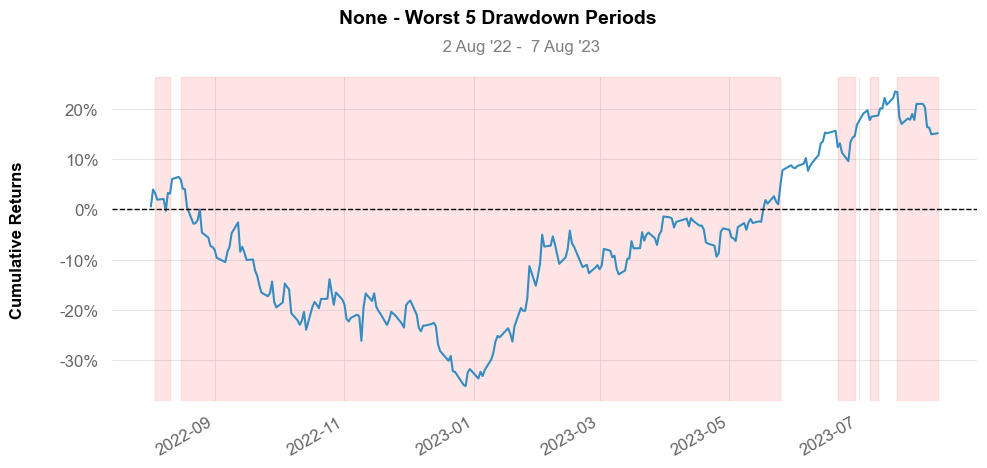

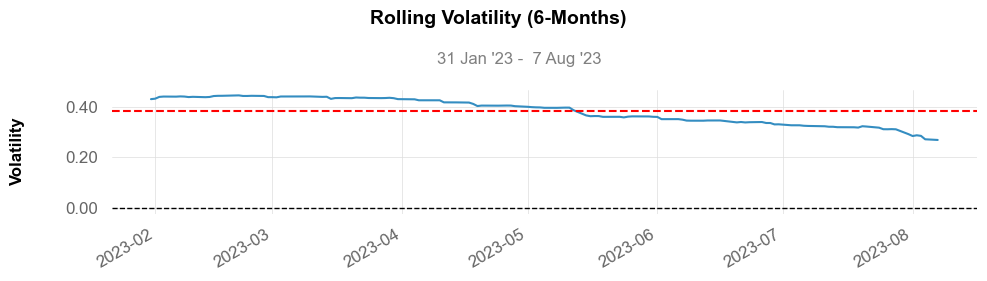

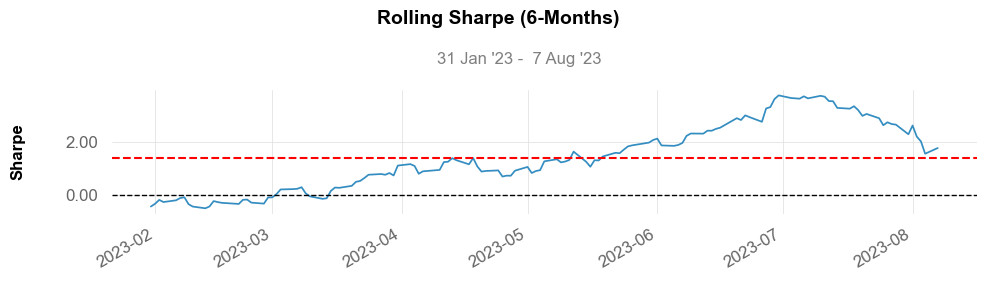

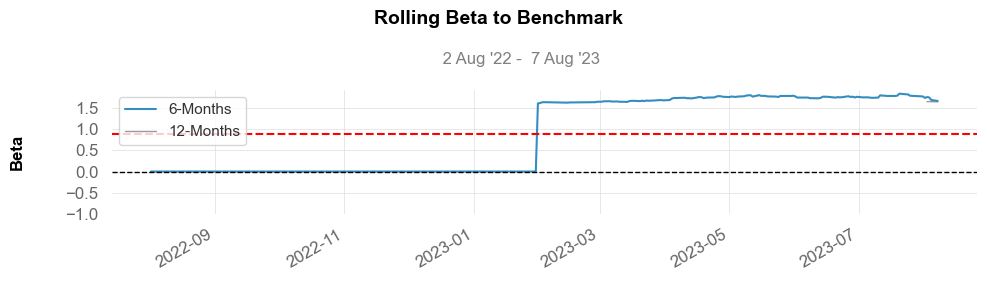

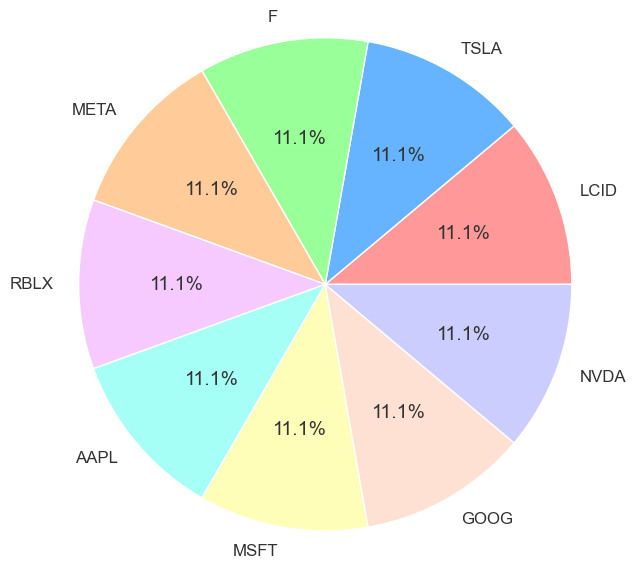

(None, None, None, None, None, None, None, None, None)

In [31]:
# Market Data from August 1st, 2022 until Present Day 

# Equally Distributed Portfolio of all Innovative Stocks and how a portfolio would perform

from empyrial import empyrial, Engine

all_nine = Engine(
    start_date = "2022-08-01", 
    portfolio = ["LCID", "TSLA", "F", "META", "RBLX", "AAPL", "MSFT", "GOOG", "NVDA"], 
    benchmark = ["SPY"]  # SPY is set by default
    #weights = #['0.5, 0.5'] or whatever amount you want to designate specific portfolio stock concentrated weights
)

empyrial(all_nine)

In [32]:
# Building a portfolio with data from `quandl`/`yfinance`
# Building a portfolio with `build_portfolio()` by downloading relevant data through `quandl`/`yfinance` with stock names, start and end date and column labels
# This example only focuses on how to use `build_portfolio()` to get an instance of `Portfolio` by providing a few items of information that is passed on to `quandl`/`yfinance`. For a more exhaustive description of this package and example, please try `Example-Analysis` and `Example-Optimisation`.

import datetime

import pandas as pd

# Importing Custom Functions from FinQuest

from finquant.portfolio import build_portfolio

# To play around yourself with different stocks, here is a short list of companies and their tickers on Yahoo Finance:
# d = {0: {'Name':'GOOG', 'Allocation':20},  # Google
#      1: {'Name':'AMZN', 'Allocation':33},  # Amazon
#      2: {'Name':'MSFT', 'Allocation':18},  # Microsoft

d = {
    0: {"Name": "LCID", "Allocation": 10},
    1: {"Name": "RIVN", "Allocation": 10},
    2: {"Name": "F", "Allocation": 10},
}

port_allocation = pd.DataFrame.from_dict(d, orient="index")

# In the below example we are using `yfinance` to download stock data. We specify the start and end date of the stock prices to be downloaded.
# We also provide the optional parameter `market_index` to download the historical data of a market index. `FinQuant` can use them to calculate the beta parameter, measuring the portfolio's daily volatility compared to the market.

# here we set the list of names based on the names in the DataFrame pf_allocation
names = port_allocation["Name"].values.tolist()

# dates can be set as datetime or string, as shown below:
start_date = datetime.datetime(2022, 8, 1)
end_date = "2023-08-01"

# the market index used to compare the portfolio to (in this case S&P 500). If the parameter is omitted, no market comparison will be done
market_index = "^GSPC"

In [33]:
# While quandl/yfinance will download lots of different prices for each stock,
# e.g. high, low, close, etc, FinQuant will extract the column "Adj. Close" ("Adj Close" if using yfinance).

pf_test = build_portfolio(
    names=names,
    start_date=start_date,
    end_date=end_date,
    data_api="yfinance",
    market_index=market_index,
)

#Show Data

pf_test.data

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


,LCID,RIVN,F
Date,,,
2022-08-01,1853.0001%,3481.0001%,1381.5180%
2022-08-02,1973.0000%,3500.9998%,1365.3072%
2022-08-03,2055.9999%,3659.0000%,1413.0389%
2022-08-04,1855.9999%,3618.0000%,1384.2197%
2022-08-05,1804.9999%,3566.9998%,1377.9156%
...,...,...,...
2023-07-25,684.0000%,2535.0000%,1358.0000%
2023-07-26,717.0000%,2715.0000%,1367.0000%
2023-07-27,689.0000%,2604.9999%,1373.0000%


In [34]:

# ## Get data from `quandl`/`yfinance` and build portfolio
# First we need to build a pandas.DataFrame that holds relevant data for our portfolio. The minimal information needed are stock names and the amount of money to be invested in them, e.g. Allocation.

# the portfolio information DataFrame
pf_df = pd.DataFrame(pf_test.data)

In [35]:
display(pf_df)

,LCID,RIVN,F
Date,,,
2022-08-01,1853.0001%,3481.0001%,1381.5180%
2022-08-02,1973.0000%,3500.9998%,1365.3072%
2022-08-03,2055.9999%,3659.0000%,1413.0389%
2022-08-04,1855.9999%,3618.0000%,1384.2197%
2022-08-05,1804.9999%,3566.9998%,1377.9156%
...,...,...,...
2023-07-25,684.0000%,2535.0000%,1358.0000%
2023-07-26,717.0000%,2715.0000%,1367.0000%
2023-07-27,689.0000%,2604.9999%,1373.0000%


In [36]:
# <codecell>

# plotting style:
plt.style.use("seaborn-v0_8-darkgrid")
# set line width
plt.rcParams["lines.linewidth"] = 2
# set font size for titles
plt.rcParams["axes.titlesize"] = 14
# set font size for labels on axes
plt.rcParams["axes.labelsize"] = 12
# set size of numbers on x-axis
plt.rcParams["xtick.labelsize"] = 10
# set size of numbers on y-axis
plt.rcParams["ytick.labelsize"] = 10
# set figure size
plt.rcParams["figure.figsize"] = (10, 6)

In [37]:

# <markdowncell>

# ### Get data from disk/file
# Here we use `pandas.read_cvs()` method to read in the data.

# <codecell>

# stock data was previously pulled from quandl and stored in ex1-stockdata.csv
# read data from files:

# <markdowncell>

# # Portfolio optimisation
# ## Efficient Frontier
# Based on the **Efficient Frontier**, the portfolio can be optimised for
#  - minimum volatility
#  - maximum Sharpe ratio
#  - minimum volatility for a given target return
#  - maximum Sharpe ratio for a given target volatility
# See below for an example for each optimisation.

# <codecell>

# if needed, change risk free rate and frequency/time window of the portfolio
print("pf_test.risk_free_rate = {}".format(pf_test.risk_free_rate))
print("pf_test.freq = {}".format(pf_test.freq))

pf_test.risk_free_rate = 0.005
pf_test.freq = 252


In [38]:
pf_test.ef_minimum_volatility(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.018
Annual Volatility: 0.395
Sharpe Ratio: 0.033

Optimal weights:
              LCID    RIVN        F
Allocation 2.7455% 1.3146% 95.9399%
----------------------------------------------------------------------


,Allocation
LCID,2.7455%
RIVN,1.3146%
F,95.9399%


In [39]:
# optimisation for maximum Sharpe ratio
pf_test.ef_maximum_sharpe_ratio(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.036
Annual Volatility: 0.406
Sharpe Ratio: 0.076

Optimal weights:
              LCID     RIVN        F
Allocation 0.0000% 16.9901% 83.0099%
----------------------------------------------------------------------


,Allocation
LCID,0.0000%
RIVN,16.9901%
F,83.0099%


In [40]:
# minimum volatility for a given target return of 0.26
pf_test.ef_efficient_return(0.26, verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Efficient Return

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.045
Annual Volatility: 0.749
Sharpe Ratio: 0.054

Optimal weights:
              LCID      RIVN       F
Allocation 0.0000% 100.0000% 0.0000%
----------------------------------------------------------------------


,Allocation
LCID,0.0000%
RIVN,100.0000%
F,0.0000%


In [41]:
# maximum Sharpe ratio for a given target volatility of 0.22
pf_test.ef_efficient_volatility(0.22, verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Efficient Volatility

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.018
Annual Volatility: 0.395
Sharpe Ratio: 0.033

Optimal weights:
              LCID    RIVN        F
Allocation 2.7593% 1.3107% 95.9301%
----------------------------------------------------------------------


,Allocation
LCID,2.7593%
RIVN,1.3107%
F,95.9301%


In [42]:
# ### Manually creating an instance of EfficientFrontier
# If required, or preferred, the below code shows how the same is achieved by manually creating an instance of EfficientFrontier, passing it the mean returns and covariance matrix of the previously assembled portfolio.

from finquant.efficient_frontier import EfficientFrontier

In [43]:
# Computing and visualising the Efficient Frontier
# `FinQuant` offers several ways to compute the *Efficient Frontier*.
#  Recommended option is through the object `portfolio or pf` with limits of the *Efficient Frontier* being automatically set
#  We let `pf` or 'pf_test' and be an instance of `Portfolio`. The following code snippets compute and plot an *Efficient Frontier* of a portfolio, its optimised portfolios and individual stocks within the portfolio.
#  - `pf.ef_plot_efrontier()`
#  - `pf.ef_plot_optimal_portfolios()`
#  - `pf.plot_stocks()`

In [44]:
# Creating an instance with new library to show EfficientFrontier

ef = EfficientFrontier(pf_test.comp_mean_returns(freq=1), pf_test.comp_cov())

# optimisation for minimum volatility

print(ef.minimum_volatility())

      Allocation
LCID     2.7455%
RIVN     1.3146%
F       95.9399%


In [45]:
# Printing out rationale for Minimum Volatility optimized portfolio

(expected_return, volatility, sharpe) = ef.properties(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.018
Annual Volatility: 0.395
Sharpe Ratio: 0.033

Optimal weights:
              LCID    RIVN        F
Allocation 2.7455% 1.3146% 95.9399%
----------------------------------------------------------------------


----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time period: 252 days
Expected return: 0.017
Volatility: 0.395
Sharpe Ratio: 0.030

Optimal weights:
              LCID    RIVN        F
Allocation 2.9766% 1.4803% 95.5431%
----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time period: 252 days
Expected return: 0.035
Volatility: 0.398
Sharpe Ratio: 0.075

Optimal weights:
              LCID    RIVN        F
Allocation 0.0134% 9.8207% 90.1659%
----------------------------------------------------------------------


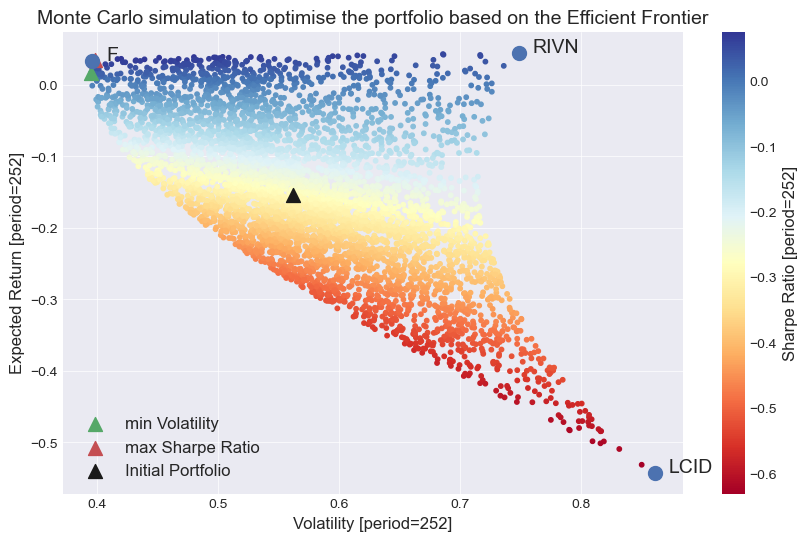

In [46]:
# ## Monte Carlo
# Perform a Monte Carlo run to find the portfolio with the minimum volatility and maximum Sharpe Ratio.

opt_w, opt_res = pf_test.mc_optimisation(num_trials=5000)
pf_test.mc_properties()
pf_test.mc_plot_results()

# Individual stocks can be added to the plot
pf_test.plot_stocks()
plt.show()

In [47]:
print(opt_res)
print()
print(opt_w)

                  Expected Return  Volatility  Sharpe Ratio
Min Volatility            1.6911%    39.4924%       3.0160%
Max Sharpe Ratio          3.4924%    39.7751%       7.5233%

                    LCID    RIVN        F
Min Volatility   2.9766% 1.4803% 95.5431%
Max Sharpe Ratio 0.0134% 9.8207% 90.1659%


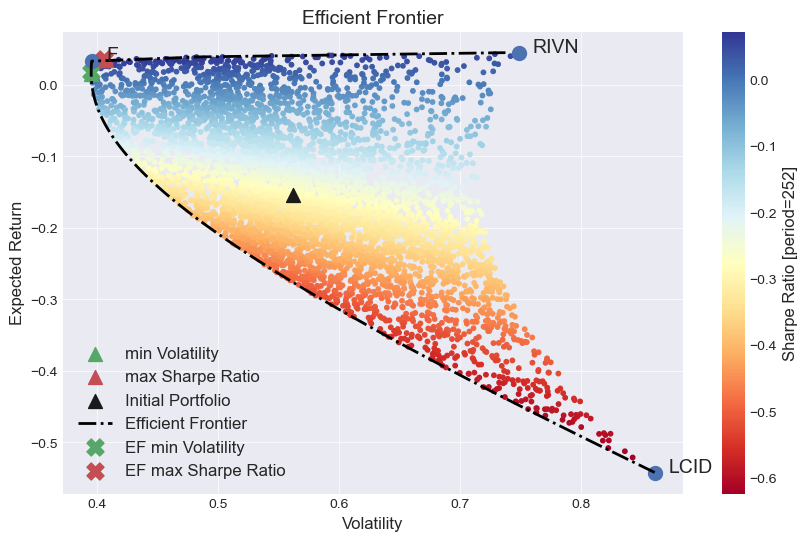

In [48]:
# # Optimisation overlay
# ## Overlay of Monte Carlo portfolios and Efficient Frontier solutions

# performs and plots results of Monte Carlo run (5000 iterations)
opt_w, opt_res = pf_test.mc_optimisation(num_trials=5000)
# plots the results of the Monte Carlo optimisation
pf_test.mc_plot_results()
# plots the Efficient Frontier
pf_test.ef_plot_efrontier()
# plots optimal portfolios based on Efficient Frontier
pf_test.ef.plot_optimal_portfolios()
# plots individual plots of the portfolio
pf_test.plot_stocks()
plt.show()

In [49]:
# Set up Sentimental Trading Dataconfiguration

# Configure Resource Folder for csv. downloaded from Google Trends and ingested into Innovest Sentiment Trading Engine

electric_file = Path('./Resources/electric_trend.csv')
meta_file = Path('./Resources/meta_trend.csv')
ai_file = Path('./Resources/ai_trend.csv')

electric_trend_csv = pd.read_csv(electric_file, index_col="Week", parse_dates=True, infer_datetime_format=True)
meta_trend_csv = pd.read_csv(meta_file, index_col="Week", parse_dates=True, infer_datetime_format=True)
ai_trend_csv = pd.read_csv(ai_file, index_col="Week", parse_dates=True, infer_datetime_format=True)

In [50]:
# Concatenate & show all Innovative Sectors into One Big DataFrame

trends_df = pd.concat([electric_trend_csv, meta_trend_csv, ai_trend_csv], axis="columns", join="inner")

trends_df.tail()

,Tesla Electric Vehicle,Lucid Electric Vehicle,Ford Electric Vehicle,Facebook Metaverse,Roblox Metaverse,Apple Metaverse,Google Artificial Intelligence,Microsoft Artificial Intelligence,Nvidia Artificial Intelligence
Week,,,,,,,,,
2023-07-02,63,5,25,17,6,8,59,10,5
2023-07-09,61,10,28,14,6,5,69,13,8
2023-07-16,76,5,29,13,8,3,67,14,6
2023-07-23,60,6,23,10,8,5,61,15,7
2023-07-30,75,0,22,15,0,0,57,9,0


In [51]:
# Identify specific trends designated by 'Company Name' + 'Sector Name'

tsla_trend = trends_df['Tesla Electric Vehicle']
lcid_trend = trends_df['Lucid Electric Vehicle']
f_trend = trends_df['Ford Electric Vehicle']
meta_trend = trends_df['Facebook Metaverse']
rblx_trend = trends_df['Roblox Metaverse']
aapl_trend = trends_df['Apple Metaverse']
google_trend = trends_df['Google Artificial Intelligence']
msft_trend = trends_df['Microsoft Artificial Intelligence']
nvda_trend = trends_df['Nvidia Artificial Intelligence']

In [52]:
# Combine and show Innovative sector specific trends

ev_trends = pd.concat([tsla_trend, lcid_trend, f_trend], axis = 'columns', join='inner')
meta_trends = pd.concat([meta_trend, rblx_trend, aapl_trend], axis = 'columns', join='inner')
ai_trends = pd.concat([google_trend, msft_trend, nvda_trend], axis = 'columns', join='inner')

meta_trends.head()

,Facebook Metaverse,Roblox Metaverse,Apple Metaverse
Week,,,
2022-08-07,40,14,8
2022-08-14,50,14,9
2022-08-21,53,22,8
2022-08-28,42,10,5
2022-09-04,43,11,9


In [73]:
# Configure functions for future Data Analysis & Data Manipulation

# Google Trends Standard Deviation

weekly_trends_std  = trends_df.std()

weekly_trends_std - weekly_trends_std.sort_values()

annualized_trends_std = weekly_trends_std * np.sqrt(52)

annualized_trends_std = annualized_trends_std.sort_values()

# Google Trends Standard Deviation

weekly_trends_std  = trends_df.std()

# Show the plot
trend_tbl = weekly_trends_std.hvplot.bar(
    xlabel='Company + Sector Name',
    ylabel='Annualized Trend Standard Deviation',
    title='Innovation Disruptor or Playing Catch Up (smaller score is better)',
    yformatter= '%.2f',
    width = 1500,
    height = 800
)

trend_tbl

:Bars   [index]   (0)

In [54]:
daily_std.iloc[0:3]

SPY    2.4767%
AAPL   3.7848%
MSFT   4.1244%
dtype: float64

In [ ]:
# Data Analysis Continued

print(f'Below, we can see which companies, accompanied by their sector, have what we internally call a "hype guage".')
print('')
print(f'This proprietary data indicator determines how likely/unlikely these companies are to remain "relavant" in their breakthrough sector:')
print('')

display(weekly_trends_std)

In [56]:
print('')
print(f'Here is each disruptors ability to remain relevant (on average):')
print('')
display(ev_trends.hvplot(xlabel='Week #', ylabel='Google Trend Score', title='Google Trends in last 12 Months for Electric Vehicle Companies', yformatter= '%.2f'))
print('')
print(f'Based on Google Trends Data, here is each Electric Vehicle company ability to stay relevant in innovative space:')
print('')
evp = ev_trends.mean()
metap = meta_trends.mean()
aip = ai_trends.mean()


Here is each disruptors ability to remain relevant (on average):



:NdOverlay   [Variable]
   :Curve   [Week]   (value)


Based on Google Trends Data, here is each Electric Vehicle company ability to stay relevant in innovative space:



In [57]:
ev_avg_trend = evp.hvplot.line(x='Week',
                     width=700, height=400,
                     ylabel='Trend Score', yformatter='%.2')

ev1 = ev_trends.hvplot(xlabel='Week #', ylabel='Google Trend Score', title='Google Trends in last 12 Months for Electric Vehicle Companies', yformatter= 'f')

ev2 = ev_port_daily.hvplot(yformatter='%.5f')

In [58]:
ev1

:NdOverlay   [Variable]
   :Curve   [Week]   (value)

In [59]:
ev2 = ev_port_daily.hvplot(yformatter='f').opts(fontscale='log')  # Use 'log' or 'linear' as needed

ev2

ValueError: Parameter 'fontscale' only takes numeric values, not type <class 'str'>.

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

In [60]:
# Dataframe Initialization for specific sectors and pricepoints for future Monte Carlo simulations vs. Sentiment Trading Analysis correlation

# `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

# Configure data to plot out initial investment and cumulative returns on initial investment

initial_investment = 10000

cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.hvplot(xlabel='Last Year', ylabel='Portfolio Return/Valuation in $USD', title='How much money would you have, if you invested $10k last year ago today?')

:Curve   [timestamp]   (0)

In [61]:
# More Extra Visualizations

combined_dly_rtn.hvplot()

# Bar Plots that will be used in future Overlay and Data Visualization Manipulation

tsla_trend_plot = tsla_trend.hvplot(kind='bar')
lcid_trend_plot = lcid_trend.hvplot(kind='bar')
f_trend_plot = f_trend.hvplot(kind='bar')
meta_trend_plot = meta_trend.hvplot(kind='bar')
rblx_trend_plot = rblx_trend.hvplot(kind='bar')
aapl_trend_plot = aapl_trend.hvplot(kind='bar')
google_trend_plot = google_trend.hvplot(kind='bar')
msft_trend_plot = msft_trend.hvplot(kind='bar')
nvda_trend_plot = nvda_trend.hvplot(kind='bar')

In [62]:
# print out information and quantities of given portfolio
print(pf_test)
pf_test.properties()

Contains information about a portfolio.
----------------------------------------------------------------------
Stocks: LCID, RIVN, F
Market Index: ^GSPC
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: -0.154
Portfolio Volatility: 0.562
Portfolio Downside Risk: 0.426
Portfolio Value at Risk: 0.770
Confidence level of Value at Risk: 95.00 %
Portfolio Sharpe Ratio: -0.284
Portfolio Sortino Ratio: -0.374
Portfolio Beta: 1.819

Skewness:
      LCID     RIVN        F
0 88.7240% 33.0346% 37.3564%

Kurtosis:
       LCID       RIVN         F
0 -39.9202% -143.1901% -74.8085%

Information:
  Allocation  Name
0   33.3333%  LCID
1   33.3333%  RIVN
2   33.3333%     F
----------------------------------------------------------------------


In [63]:
# the portfolio stock data, prices DataFrame
print(pf_test.data)

# the portfolio information DataFrame

print(pf_test.portfolio)


                 LCID       RIVN          F
Date                                       
2022-08-01 1853.0001% 3481.0001% 1381.5180%
2022-08-02 1973.0000% 3500.9998% 1365.3072%
2022-08-03 2055.9999% 3659.0000% 1413.0389%
2022-08-04 1855.9999% 3618.0000% 1384.2197%
2022-08-05 1804.9999% 3566.9998% 1377.9156%
...               ...        ...        ...
2023-07-25  684.0000% 2535.0000% 1358.0000%
2023-07-26  717.0000% 2715.0000% 1367.0000%
2023-07-27  689.0000% 2604.9999% 1373.0000%
2023-07-28  747.0000% 2694.0001% 1326.0000%
2023-07-31  761.0000% 2763.9999% 1321.0000%

[251 rows x 3 columns]
  Allocation  Name
0   33.3333%  LCID
1   33.3333%  RIVN
2   33.3333%     F


In [64]:
# Sandbox for Experimental Data Manipulation for Alexis

print(f'What is up guys?!')

names = ['GOOG', 'AMZN', 'MCD', 'DIS']
start_date = '2022-08-01'
end_date = '2023-08-01'

pf_hi = build_portfolio(names=names,
                    start_date=start_date,
                    end_date=end_date)

# performs and plots results of Monte Carlo run (5000 iterations)
opt_w, opt_res = pf_hi.mc_optimisation(num_trials=5000)
# plots the results of the Monte Carlo optimisation
pf_hi.mc_plot_results()
# plots the Efficient Frontier
pf_hi.ef_plot_efrontier()
# plots optimal portfolios based on Efficient Frontier
pf_hi.ef.plot_optimal_portfolios()
# plots individual plots of the portfolio
pf_hi.plot_stocks()

What is up guys?!


Exception: Error during download of stock data from Quandl.
Make sure all the requested stock names/tickers are supported by Quandl.

In [ ]:
# Sandbox for Experimental Data Manipulation for Bryant

import requests

url = "https://twelve-data1.p.rapidapi.com/technical_indicators"

headers = {
	"X-RapidAPI-Key": "93e9c01dcfmsh13483fcf61474d7p1d64aajsn24ae60812857",
	"X-RapidAPI-Host": "twelve-data1.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

print(response.json())

In [ ]:
# Sandbox for Experimental Data Manipulation for Stephan
